In [1]:
#Reading a dataset into python - Use Pandas
import pandas as pd

In [3]:
#Using pandas to read any CSV file. You can also read directly from a url and save the result.
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

#displaying the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 4)

In [ ]:
#from the above, we can see that there are 200 observations and 3 features, 1 response (sales).

In [6]:
import seaborn as sns

%matplotlib inline

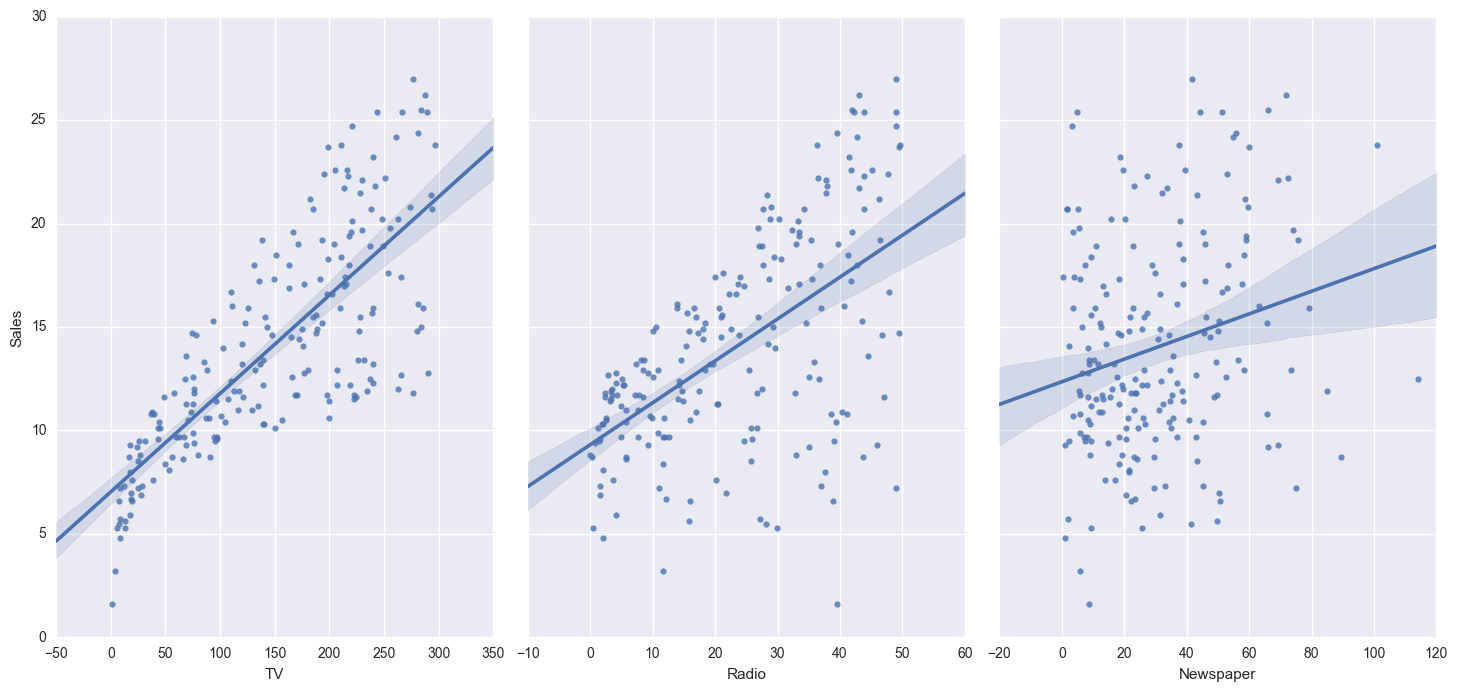

In [8]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size = 7, aspect = 0.7, kind='reg')

In [25]:
##Preparing X and y using Pandas
##First let us assign our first 3 features to X (remember that X is our regressor variable here)
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]

#the above can be written as:

X = data[['TV','Radio','Newspaper']]

In [15]:
#Confirming that X now only has 3 headers (that we had successfully manipulated the data to take only the first 3 columns):
#Print the first 5 rows
print(X.head())

#Prints the type of data X is stored as
print(type(X))

#Prints the shape of X
print(X.shape)

      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [16]:
##Now we assign our dependent variable:
y = data['Sales']
#^note the single bracket compared to the X variable

y = data.Sales

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [17]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [19]:
##Splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [21]:
##Linear regression in scikit-learn
# 1) First we import the model
from sklearn.linear_model import LinearRegression

In [22]:
# 2) Instantiate
linreg = LinearRegression()

# 3) Fit the model to the training data (train and learn the coefficients)
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
##Interpreting model coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [31]:
zip(feature_cols, linreg.coef_)

In [32]:
##Finally, making predictions on the Testing set:
y_pred = linreg.predict(X_test)

In [34]:
##Finding the errors.
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.40465142303


In [ ]:
##does Newspaper "belong" in our model? Rerunning the model w/o Newspaper due to its low importance.